In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("bbc_news_dataset.csv")


In [3]:
category_names = df["Category"].unique()
print(category_names)
value_count = df["Category"].value_counts()

['business' 'tech' 'politics' 'sport' 'entertainment']


<BarContainer object of 5 artists>

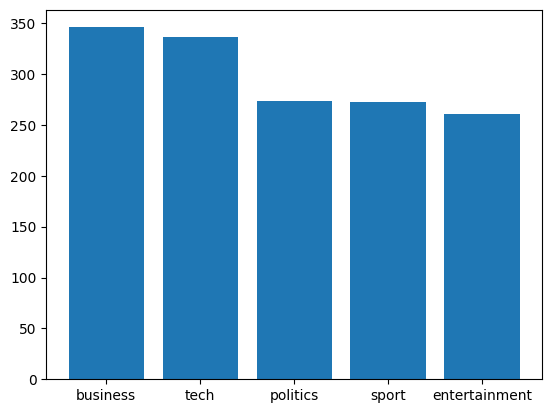

In [4]:
plt.bar(x=category_names,height=value_count)

In [5]:
X = df["Text"]
y = df["Category"]

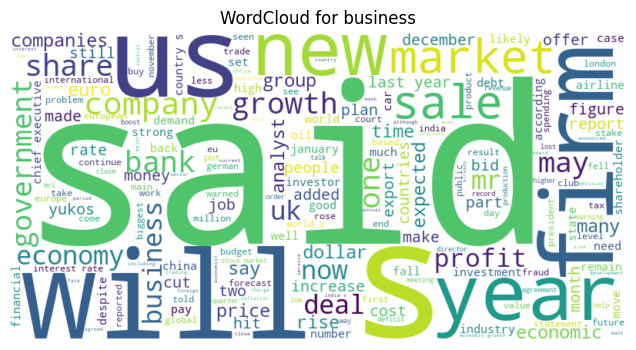

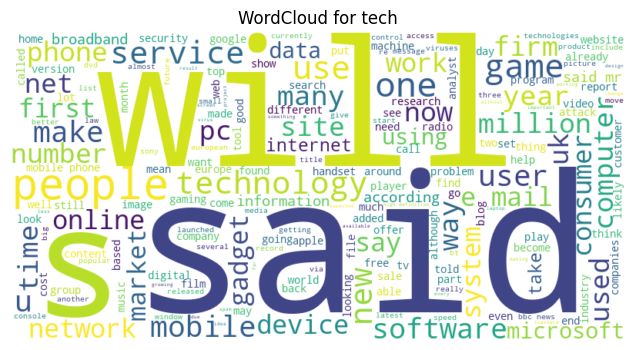

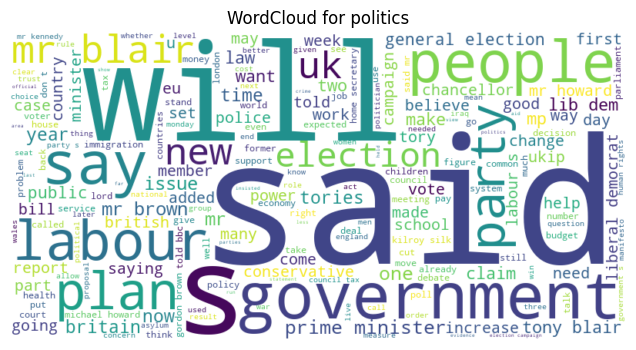

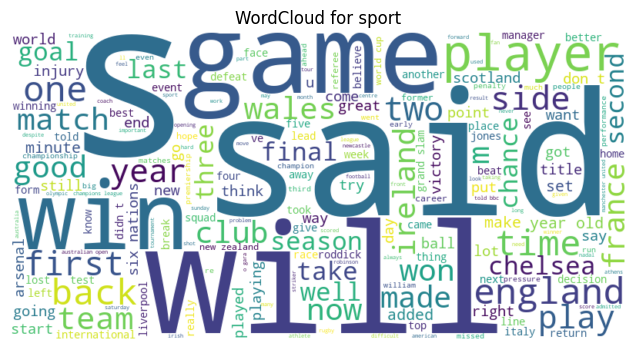

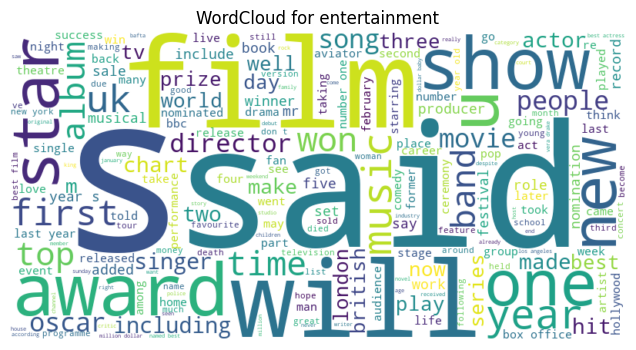

In [6]:
from wordcloud import WordCloud
for category in category_names:
    text = " ".join(df[df["Category"] == category]['Text'].values)
    wc = WordCloud(width=800,height=400,background_color='white').generate(text=text)
    plt.figure(figsize=(8,4))
    plt.imshow(wc,interpolation='bilinear')
    plt.title(f'WordCloud for {category}')
    plt.axis('off')
    plt.savefig(f'WordCloud for {category}.png')
    plt.show()
    
    
    

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [10]:
model = make_pipeline(TfidfVectorizer(stop_words='english'),MultinomialNB())
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))



0.9563758389261745
               precision    recall  f1-score   support

     business       0.94      0.97      0.95        75
entertainment       1.00      0.96      0.98        46
     politics       0.91      0.95      0.93        56
        sport       0.97      1.00      0.98        63
         tech       0.98      0.90      0.94        58

     accuracy                           0.96       298
    macro avg       0.96      0.95      0.96       298
 weighted avg       0.96      0.96      0.96       298



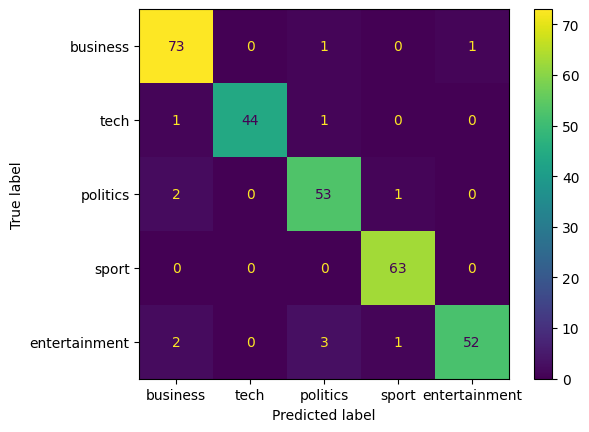

In [11]:
matrix = confusion_matrix(y_test,y_pred)
matrix_plot = ConfusionMatrixDisplay(matrix,display_labels=category_names)
matrix_plot.plot()
plt.savefig("hello.png")

In [ ]:

test_text = ["Senior US and Iranian officials are expected to meet in Oman later for direct talks amid a crisis that has raised fears of a military confrontation between the two countries.The discussions come after a US military build-up in the Middle East in response to Iran's violent repression of nationwide anti-government protests last month, that human rights groups say killed many thousands of people.Uncertainty over the location and scope had threatened to derail the talks, which are part of a diplomatic effort by regional mediators to de-escalate tensions."
]

predections = model.predict(test_text)
for text, predection in zip(test_text,predections):
    print(f"Text: {text[:20]}... | Predicted {predection}")




Text: 
Senior US and Irani... | Predicted business
Text: Kp sharma oli meets ... | Predicted sport


In [16]:
import joblib
joblib.dump(model,"bbc_model.joblib")

['bbc_model.joblib']